<a href="https://colab.research.google.com/github/biaespinheira/ML-Studies/blob/main/%C3%81rvore_de_Decis%C3%A3o_Empr%C3%A9stimo_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Como implementar uma árvore para decidir se aprova ou não um empréstimo.

In [3]:
# Dataset de teste - Aprovação de Empréstimo
dados_emprestimo = {"estado.civil" :["solteiro", "casado", "solteiro", "casado", "solteiro"],
                                "renda.mensal" : [1000, 2000, 3000, 3500, 4000],
                                "aprova.emprestimo": ["NÃO","SIM", "NÃO","SIM", "SIM"]
}

dados = pd.DataFrame(dados_emprestimo)
dados

,estado.civil,renda.mensal,aprova.emprestimo
0,solteiro,1000,NÃO
1,casado,2000,SIM
2,solteiro,3000,NÃO
3,casado,3500,SIM
4,solteiro,4000,SIM


### Como implementar e treinar a árvore de decisão?

In [9]:
# Transformando dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#fit transform também serve
le.fit(dados['estado.civil'])
dados['estado.civil'] = le.transform(dados['estado.civil'])

le.fit(dados['aprova.emprestimo'])
dados['aprova.emprestimo'] = le.transform(dados['aprova.emprestimo'])
dados

,estado.civil,renda.mensal,aprova.emprestimo
0,1,1000,0
1,0,2000,1
2,1,3000,0
3,0,3500,1
4,1,4000,1


In [11]:
# Determinar X e y
X = dados.drop(columns=['aprova.emprestimo'], axis=1)
y=dados['aprova.emprestimo']
y

,aprova.emprestimo
0,0
1,1
2,0
3,1
4,1


In [12]:
# Carregar biblioteca
from sklearn.tree import plot_tree, DecisionTreeClassifier

# Criar o modelo de Árvore de Decisão para Classificação
model = DecisionTreeClassifier(random_state=33, criterion='gini')

# Treinar o modelo
model.fit(X, y)

DecisionTreeClassifier(random_state=33)

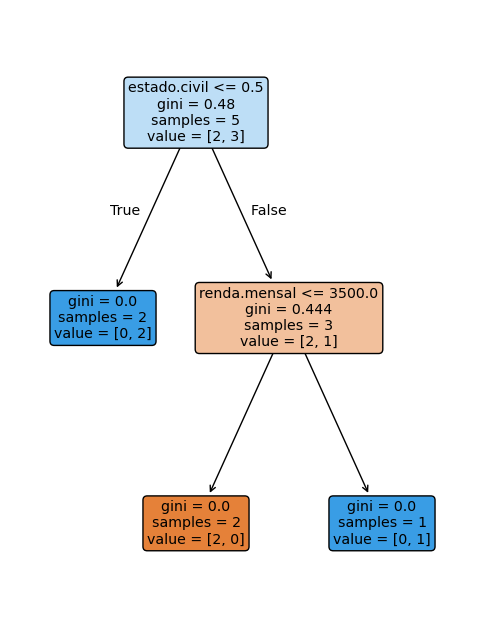

In [15]:
# Exibir árvore
fig, ax = plt.subplots(figsize=(6,8))
plot_tree(model, feature_names=X.columns, ax=ax, filled=True, rounded=True)
plt.show()

### Como efetuar novas previsões?

In [17]:
# Predizer o resultado de empréstimo para novos clientes
novos_dados_X = {"estado.civil" :[1, 0],
                "renda.mensal" : [1000,2600]
}

# Efetua predição
dados_pred= pd.DataFrame(novos_dados_X)
y_pred = model.predict(dados_pred)

# Imprimir valores
dados_pred['aprova.emprestmo'] = y_pred

dados_pred

,estado.civil,renda.mensal,aprova.emprestmo
0,1,1000,0
1,0,2600,1
